Triangle Wave Frequency Features: (np.float64(0.0), np.float64(511.4995112414467), array([5.11499511e+02, 5.06515968e-01, 5.18507015e-01, 5.41047873e-01,
       5.83088078e-01]))
Cosine Wave Frequency Features: (np.float64(5.0), np.float64(512.2300327990882), array([1.        , 1.04158031, 1.19002622, 1.56076407, 2.76810129]))
Trapezoid Wave Frequency Features: (np.float64(5.0), np.float64(311.69660136192766), array([4.33195146e-14, 1.34932096e-01, 3.15910448e-01, 6.00454025e-01,
       1.38837455e+00]))


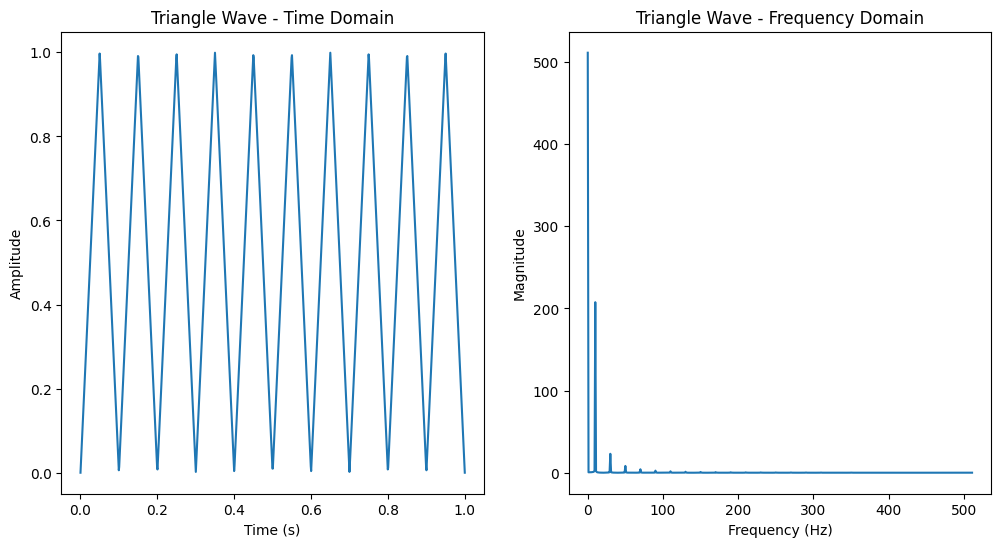

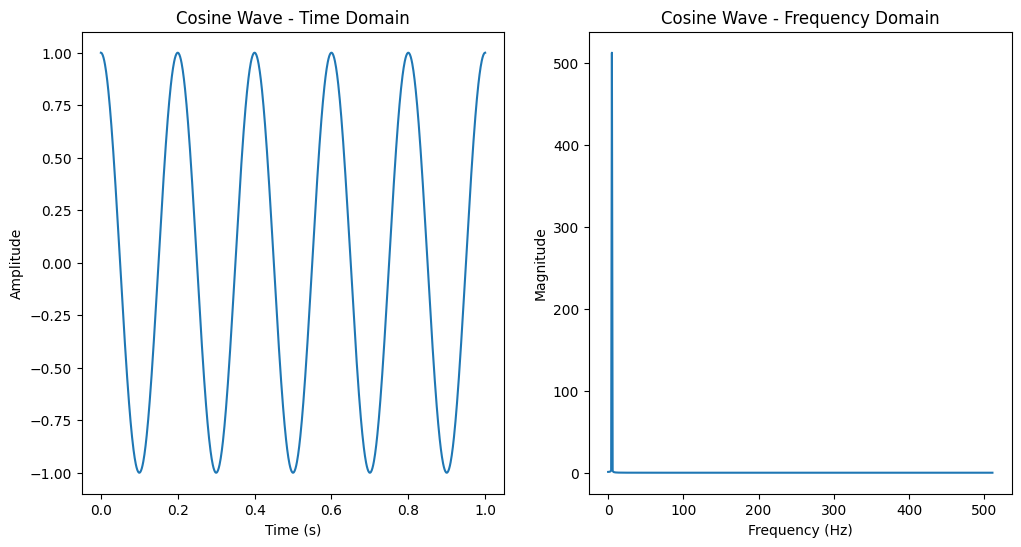

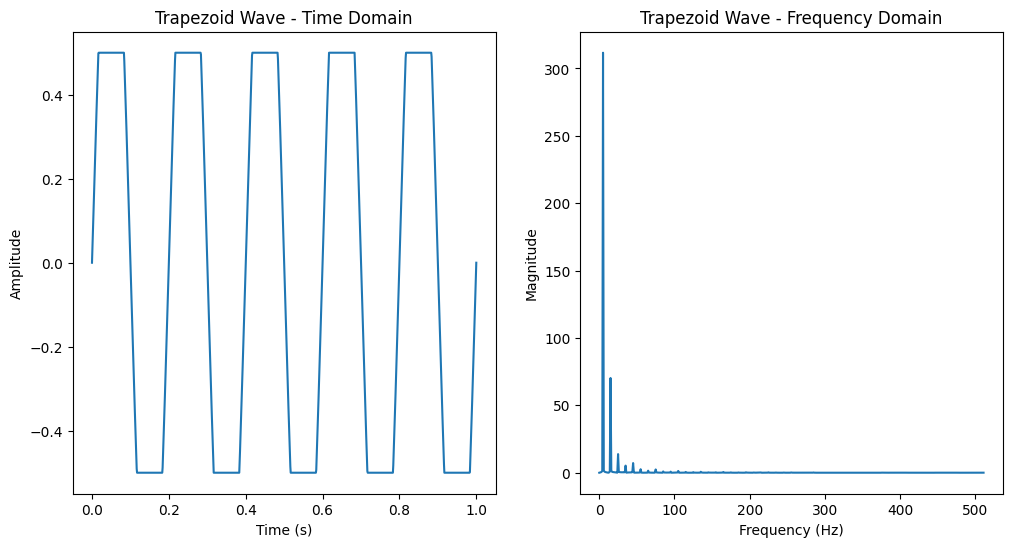

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 生成一些示例波形
def generate_waveforms(num_samples=1024):
    t = np.linspace(0, 1, num_samples)
    
    # 生成不同波形
    triangle_wave = 2 * np.abs(np.arcsin(np.sin(2 * np.pi * 5 * t))) / np.pi
    cosine_wave = np.cos(2 * np.pi * 5 * t)
    trapezoid_wave = np.clip(np.sin(2 * np.pi * 5 * t), -0.5, 0.5)
    
    return triangle_wave, cosine_wave, trapezoid_wave

# FFT提取频域特征
def extract_frequency_features(signal, sampling_rate=1024):
    # 计算FFT
    fft_result = np.fft.fft(signal)
    
    # 计算频率轴
    freqs = np.fft.fftfreq(len(signal), d=1/sampling_rate)
    
    # 只取前半部分，因为FFT结果是对称的
    positive_freqs = freqs[:len(freqs)//2]
    fft_magnitude = np.abs(fft_result)[:len(freqs)//2]  # 幅值谱
    fft_phase = np.angle(fft_result)[:len(freqs)//2]    # 相位谱
    
    # 选择频域特征：主频、最大幅值、以及若干低频谐波成分
    main_frequency_index = np.argmax(fft_magnitude)  # 找到主频
    main_frequency = positive_freqs[main_frequency_index]
    main_amplitude = fft_magnitude[main_frequency_index]
    
    # 选取前N个频率分量（低频分量）
    num_harmonics = 5
    top_harmonics_amplitudes = fft_magnitude[:num_harmonics]
    
    # 返回频域特征
    return main_frequency, main_amplitude, top_harmonics_amplitudes

# 生成波形
triangle_wave, cosine_wave, trapezoid_wave = generate_waveforms()

# 提取频域特征
triangle_freq_features = extract_frequency_features(triangle_wave)
cosine_freq_features = extract_frequency_features(cosine_wave)
trapezoid_freq_features = extract_frequency_features(trapezoid_wave)

# 打印特征
print("Triangle Wave Frequency Features:", triangle_freq_features)
print("Cosine Wave Frequency Features:", cosine_freq_features)
print("Trapezoid Wave Frequency Features:", trapezoid_freq_features)

# 可视化波形和其频谱
def plot_waveform_and_spectrum(waveform, sampling_rate=1024, title="Waveform and Spectrum"):
    # 绘制波形
    plt.figure(figsize=(12, 6))
    
    # 时域波形
    plt.subplot(1, 2, 1)
    t = np.linspace(0, 1, len(waveform))
    plt.plot(t, waveform)
    plt.title(f"{title} - Time Domain")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    
    # 频域特征
    plt.subplot(1, 2, 2)
    fft_result = np.fft.fft(waveform)
    freqs = np.fft.fftfreq(len(waveform), d=1/sampling_rate)
    positive_freqs = freqs[:len(freqs)//2]
    fft_magnitude = np.abs(fft_result)[:len(freqs)//2]
    
    plt.plot(positive_freqs, fft_magnitude)
    plt.title(f"{title} - Frequency Domain")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.show()

# 绘制波形和频谱
plot_waveform_and_spectrum(triangle_wave, title="Triangle Wave")
plot_waveform_and_spectrum(cosine_wave, title="Cosine Wave")
plot_waveform_and_spectrum(trapezoid_wave, title="Trapezoid Wave")